<a href="https://colab.research.google.com/github/Sushil211/CNN/blob/master/cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Model

In [4]:
in_layer = Input(shape=(28,28))
reshaped = Reshape(target_shape=(28,28,1))(in_layer)

conv = Conv2D(filters=60, kernel_size=3)(reshaped)
pooling = MaxPooling2D()(conv)
conv = Conv2D(filters=60, kernel_size=3)(pooling)
pooling = MaxPooling2D()(conv)
conv = Conv2D(filters=60, kernel_size=3)(pooling)
pooling = MaxPooling2D()(conv)

flat = Flatten()(pooling)

d1 = Dense(units = 400, activation="tanh")(flat)
d2 = Dense(units=100, activation="tanh")(d1)
out_layer = Dense(units=10, activation="softmax")(d2)

In [5]:
model = Model(in_layer, out_layer)

In [6]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 60)        600       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 60)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 60)        32460     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 60)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 60)          32460 

In [7]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [8]:
model.fit(X_train, to_categorical(y_train, num_classes=10), batch_size=1000, epochs=10)

Epoch 1/10
60/60 [==============================] - 3s 46ms/step - loss: 0.6844 - accuracy: 0.8004
Epoch 2/10
60/60 [==============================] - 3s 46ms/step - loss: 0.1790 - accuracy: 0.9475
Epoch 3/10
60/60 [==============================] - 3s 46ms/step - loss: 0.1196 - accuracy: 0.9650
Epoch 4/10
60/60 [==============================] - 3s 46ms/step - loss: 0.0954 - accuracy: 0.9725
Epoch 5/10
60/60 [==============================] - 3s 46ms/step - loss: 0.0814 - accuracy: 0.9758
Epoch 6/10
60/60 [==============================] - 3s 46ms/step - loss: 0.0734 - accuracy: 0.9780
Epoch 7/10
60/60 [==============================] - 3s 46ms/step - loss: 0.0612 - accuracy: 0.9816
Epoch 8/10
60/60 [==============================] - 3s 46ms/step - loss: 0.0568 - accuracy: 0.9826
Epoch 9/10
60/60 [==============================] - 3s 46ms/step - loss: 0.0481 - accuracy: 0.9857
Epoch 10/10
60/60 [==============================] - 3s 46ms/step - loss: 0.0411 - accuracy: 0.9879


In [9]:
model.evaluate(X_train, to_categorical(y_train, num_classes = 10))

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0318 - accuracy: 0.9906


[0.031774092465639114, 0.9905999898910522]

In [10]:
model.evaluate(X_test, to_categorical(y_test, num_classes = 10))

313/313 [==============================] - 1s 4ms/step - loss: 0.0539 - accuracy: 0.9820


[0.05388551577925682, 0.9819999933242798]

In [11]:
m2 = Model(model.input, model.layers[2].output)
m2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 60)        600       
Total params: 600
Trainable params: 600
Non-trainable params: 0
_________________________________________________________________


In [12]:
#Let's take the first image
output = m2.predict(X_train[:1])

In [13]:
X_train[:1].shape

(1, 28, 28)

In [14]:
output.shape

(1, 26, 26, 60)

In [16]:
imgs = output[0]

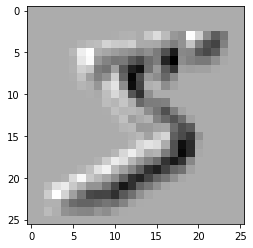

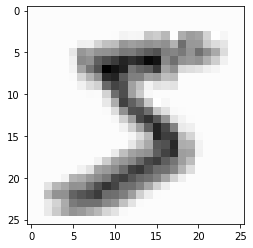

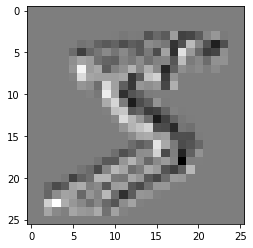

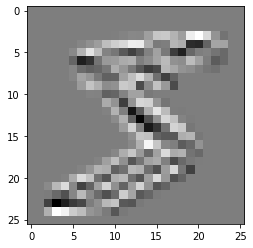

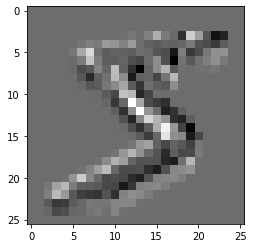

In [17]:
for i in range(5):
  img = imgs[:, :, i]
  plt.figure()
  plt.imshow(img, cmap="gray")
  plt.show()

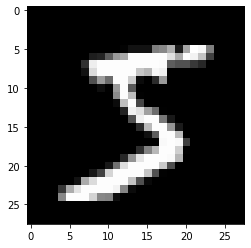

In [18]:
plt.imshow(X_train[0], cmap="gray")
plt.show()